<a href="https://colab.research.google.com/github/Davedaz23/BCRFAO/blob/Braile/David.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

import os

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
import PIL
import cv2

In [9]:
image_dir = Path('/content/drive/MyDrive/Colab Notebooks/Dataset')

In [10]:
dir_list = list(image_dir.glob('*.jpg'))

In [11]:
image_count = len(dir_list)
image_count

26

In [12]:
name_list = []
for i in dir_list:
    name_list.append(os.path.basename(i)[0])

In [13]:
images = []
for dir in dir_list:
    I = cv2.imread(str(dir))
    images.append(I)

In [15]:
images_list = np.array(images)
name_list = np.array(name_list).T

In [17]:
le = LabelEncoder()
name_list = le.fit_transform(name_list)
images_list = images_list / 255.0

In [18]:
images_list.shape

(26, 28, 28, 3)

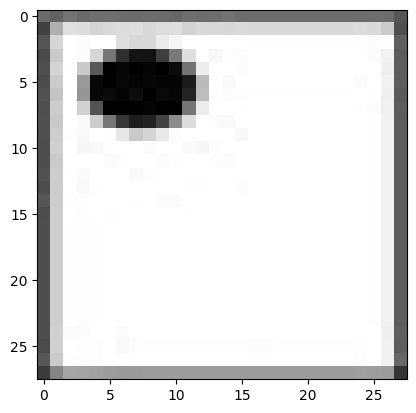

In [19]:
plt.imshow(images_list[0])

In [20]:
images_list.shape

(26, 28, 28, 3)

In [21]:
name_list.shape

(26,)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(images_list, name_list, test_size=0.2, random_state=42)

In [24]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=576, activation="relu"),
    keras.layers.Dense(units=288, activation="relu"),
    keras.layers.Dense(units=26, activation="softmax") #output layer
])

In [25]:
model.compile(optimizer="Adam", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])

In [26]:
from keras.callbacks import EarlyStopping

In [27]:
es1 = EarlyStopping(patience=20, monitor="val_acc", mode="auto")
es2 = EarlyStopping(patience=20, monitor="val_loss", mode="auto")

#The neural network will stop fitting if it gets 20 epochs without converge

history = model.fit(x=X_train,
                    y=y_train,
                    epochs=1000,
                    validation_split=0.3,
                    callbacks=[es1, es2])

Epoch 1/1000
1/1 [==============================] - ETA: 0s - loss: 3.2526 - sparse_categorical_accuracy: 0.0714

1/1 [==============================] - 8s 8s/step - loss: 3.2526 - sparse_categorical_accuracy: 0.0714 - val_loss: 3.4639 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - ETA: 0s - loss: 3.1444 - sparse_categorical_accuracy: 0.0714

1/1 [==============================] - 0s 385ms/step - loss: 3.1444 - sparse_categorical_accuracy: 0.0714 - val_loss: 3.9846 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - ETA: 0s - loss: 2.9384 - sparse_categorical_accuracy: 0.0714

1/1 [==============================] - 0s 314ms/step - loss: 2.9384 - sparse_categorical_accuracy: 0.0714 - val_loss: 5.5627 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - ETA: 0s - loss: 2.7445 - sparse_categorical_accuracy: 0.0714

1/1 [==============================] - 0s 146ms/step - loss: 2.7445 - sparse_categorical_accuracy: 0.0714 - val_loss: 7.9180 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - ETA: 0s - loss: 2.6177 - sparse_categorical_accuracy: 0.0714

1/1 [==============================] - 0s 143ms/step - loss: 2.6177 - sparse_categorical_accuracy: 0.0714 - val_loss: 10.0837 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - ETA: 0s - loss: 2.5087 - sparse_categorical_accuracy: 0.1429

1/1 [==============================] - 0s 138ms/step - loss: 2.5087 - sparse_categorical_accuracy: 0.1429 - val_loss: 12.7401 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 7/1000
1/1 [==============================] - ETA: 0s - loss: 2.4799 - sparse_categorical_accuracy: 0.1429

1/1 [==============================] - 0s 215ms/step - loss: 2.4799 - sparse_categorical_accuracy: 0.1429 - val_loss: 14.2080 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 8/1000
1/1 [==============================] - ETA: 0s - loss: 2.2700 - sparse_categorical_accuracy: 0.1429

1/1 [==============================] - 0s 236ms/step - loss: 2.2700 - sparse_categorical_accuracy: 0.1429 - val_loss: 16.3378 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 9/1000
1/1 [==============================] - ETA: 0s - loss: 2.1514 - sparse_categorical_accuracy: 0.3571

1/1 [==============================] - 0s 250ms/step - loss: 2.1514 - sparse_categorical_accuracy: 0.3571 - val_loss: 18.6426 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 10/1000
1/1 [==============================] - ETA: 0s - loss: 1.9419 - sparse_categorical_accuracy: 0.2857

1/1 [==============================] - 0s 250ms/step - loss: 1.9419 - sparse_categorical_accuracy: 0.2857 - val_loss: 20.9381 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 11/1000
1/1 [==============================] - ETA: 0s - loss: 1.5856 - sparse_categorical_accuracy: 0.4286

1/1 [==============================] - 0s 252ms/step - loss: 1.5856 - sparse_categorical_accuracy: 0.4286 - val_loss: 24.2718 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 12/1000
1/1 [==============================] - ETA: 0s - loss: 1.3688 - sparse_categorical_accuracy: 0.5714

1/1 [==============================] - 0s 286ms/step - loss: 1.3688 - sparse_categorical_accuracy: 0.5714 - val_loss: 27.4506 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 13/1000
1/1 [==============================] - ETA: 0s - loss: 0.9643 - sparse_categorical_accuracy: 0.7857

1/1 [==============================] - 0s 241ms/step - loss: 0.9643 - sparse_categorical_accuracy: 0.7857 - val_loss: 32.2192 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 14/1000
1/1 [==============================] - ETA: 0s - loss: 0.7775 - sparse_categorical_accuracy: 0.7857

1/1 [==============================] - 0s 293ms/step - loss: 0.7775 - sparse_categorical_accuracy: 0.7857 - val_loss: 36.4528 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 15/1000
1/1 [==============================] - ETA: 0s - loss: 0.5035 - sparse_categorical_accuracy: 0.8571

1/1 [==============================] - 0s 276ms/step - loss: 0.5035 - sparse_categorical_accuracy: 0.8571 - val_loss: 41.0901 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 16/1000
1/1 [==============================] - ETA: 0s - loss: 0.5060 - sparse_categorical_accuracy: 0.7857

1/1 [==============================] - 0s 237ms/step - loss: 0.5060 - sparse_categorical_accuracy: 0.7857 - val_loss: 45.9678 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 17/1000
1/1 [==============================] - ETA: 0s - loss: 0.3324 - sparse_categorical_accuracy: 0.8571

1/1 [==============================] - 0s 278ms/step - loss: 0.3324 - sparse_categorical_accuracy: 0.8571 - val_loss: 48.5277 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 18/1000
1/1 [==============================] - ETA: 0s - loss: 0.1947 - sparse_categorical_accuracy: 0.9286

1/1 [==============================] - 0s 233ms/step - loss: 0.1947 - sparse_categorical_accuracy: 0.9286 - val_loss: 49.7482 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 19/1000
1/1 [==============================] - ETA: 0s - loss: 0.1202 - sparse_categorical_accuracy: 1.0000

1/1 [==============================] - 0s 265ms/step - loss: 0.1202 - sparse_categorical_accuracy: 1.0000 - val_loss: 51.6850 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 20/1000
1/1 [==============================] - ETA: 0s - loss: 0.1285 - sparse_categorical_accuracy: 0.9286

1/1 [==============================] - 0s 226ms/step - loss: 0.1285 - sparse_categorical_accuracy: 0.9286 - val_loss: 53.8010 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 21/1000
1/1 [==============================] - ETA: 0s - loss: 0.0347 - sparse_categorical_accuracy: 1.0000

1/1 [==============================] - 0s 277ms/step - loss: 0.0347 - sparse_categorical_accuracy: 1.0000 - val_loss: 55.7650 - val_sparse_categorical_accuracy: 0.0000e+00


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          3

In [31]:
time = np.arange(1, len(history.history['loss'])+1)

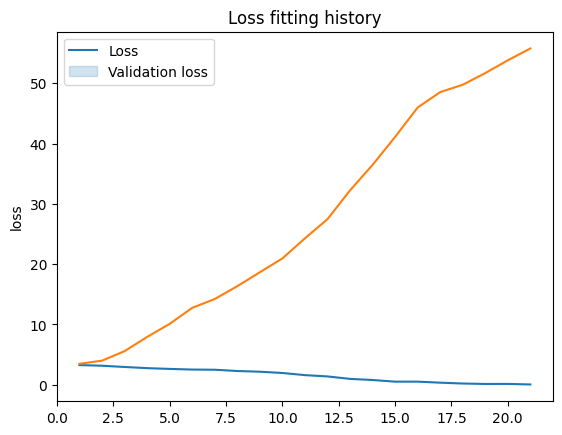

In [32]:
sns.lineplot(data=history.history, x=time, y='loss')
sns.lineplot(data=history.history, x=time, y='val_loss')
plt.title('Loss fitting history')
plt.legend(labels=['Loss', 'Validation loss'])

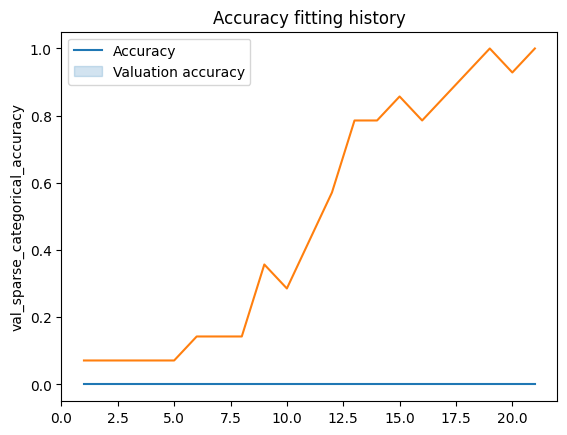

In [33]:
sns.lineplot(data=history.history, x=time, y='val_sparse_categorical_accuracy')
sns.lineplot(data=history.history, x=time, y='sparse_categorical_accuracy')
plt.title('Accuracy fitting history')
plt.legend(labels=['Accuracy', 'Valuation accuracy'])

In [34]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 56ms/step - loss: 50.6486 - sparse_categorical_accuracy: 0.0000e+00


[50.648616790771484, 0.0]